# Final Project Notebook
This notebook covers all 8 tasks as outlined in your final project instructions, using a books dataset.

In [2]:
# Task 0: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv(r"C:\Users\dawit\BestsellingBooks\bestsellers with categories.csv")
print("Dataset Loaded. Shape:", df.shape)

Dataset Loaded. Shape: (550, 7)


In [3]:
# Task 1: Dataset Summary
print("\n--- Dataset Summary ---")
print(df.info())
print("\nDescriptive Stats:\n", df.describe())
print("\nGenre distribution:\n", df['Genre'].value_counts())


--- Dataset Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

Descriptive Stats:
        User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.00000


--- Data Exploration Plan ---


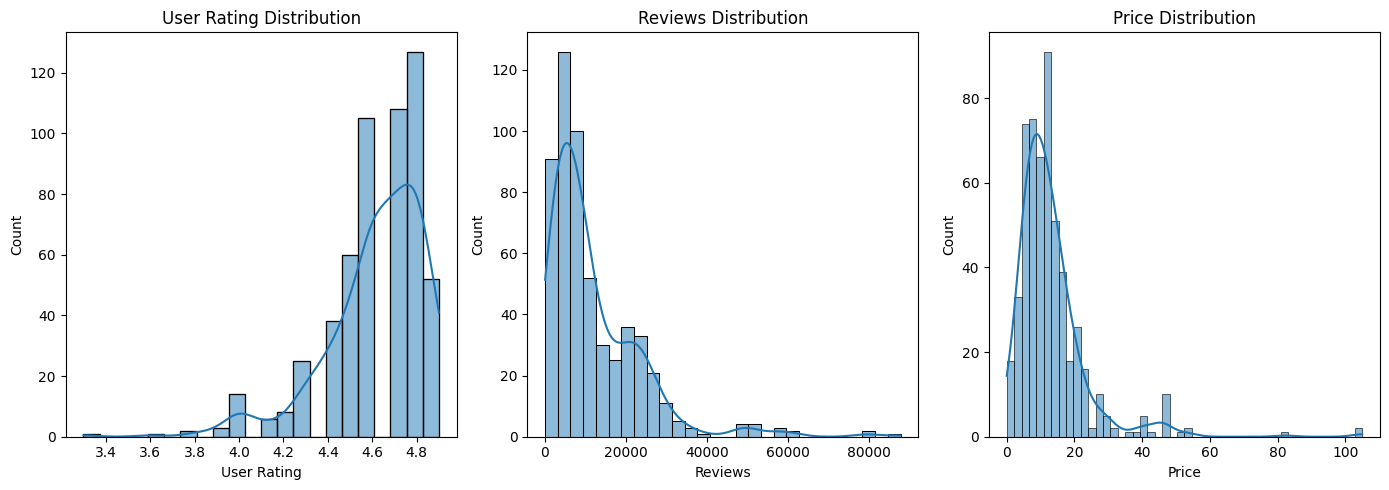

In [4]:
# Task 2: Data Exploration Plan
print("\n--- Data Exploration Plan ---")
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['User Rating'], kde=True).set_title("User Rating Distribution")
plt.subplot(1, 3, 2)
sns.histplot(df['Reviews'], kde=True).set_title("Reviews Distribution")
plt.subplot(1, 3, 3)
sns.histplot(df['Price'], kde=True).set_title("Price Distribution")
plt.tight_layout()
plt.show()


--- EDA ---


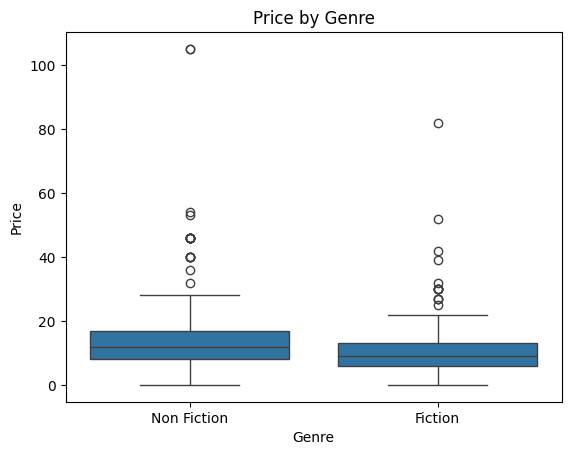

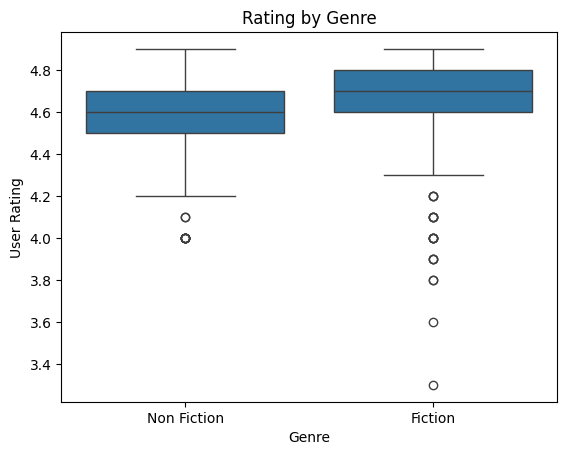

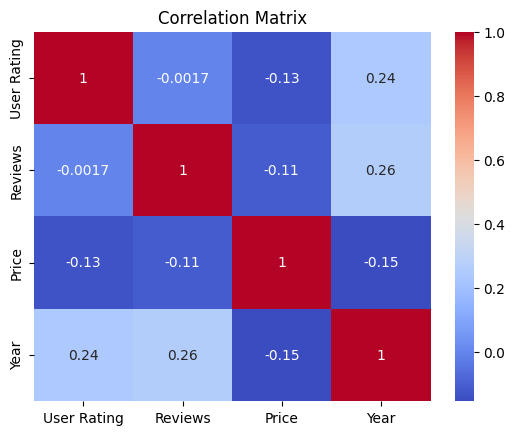

In [5]:
# Task 3: EDA
print("\n--- EDA ---")
sns.boxplot(x='Genre', y='Price', data=df).set_title("Price by Genre")
plt.show()

sns.boxplot(x='Genre', y='User Rating', data=df).set_title("Rating by Genre")
plt.show()

corr = df[['User Rating', 'Reviews', 'Price', 'Year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm').set_title("Correlation Matrix")
plt.show()

In [6]:
# Task 4: Data Cleaning & Feature Engineering
print("\n--- Data Cleaning & Feature Engineering ---")
print("Missing values:\n", df.isnull().sum())
df['Decade'] = (df['Year'] // 10) * 10
df['Log_Reviews'] = np.log1p(df['Reviews'])


--- Data Cleaning & Feature Engineering ---
Missing values:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [7]:
# Task 5: Key Findings & Insights
print("\n--- Key Insights ---")
print("Average Rating by Genre:\n", df.groupby('Genre')['User Rating'].mean())
print("Correlation between Reviews and Rating:\n", df[['Reviews', 'User Rating']].corr())


--- Key Insights ---
Average Rating by Genre:
 Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64
Correlation between Reviews and Rating:
               Reviews  User Rating
Reviews      1.000000    -0.001729
User Rating -0.001729     1.000000


In [8]:
# Task 6: Hypothesis Formulation
print("\n--- Hypothesis Formulation ---")
print("H1: Non Fiction books have higher average ratings than Fiction books.")
print("H2: Books with more reviews tend to have higher user ratings.")
print("H3: Book prices have increased over the years.")


--- Hypothesis Formulation ---
H1: Non Fiction books have higher average ratings than Fiction books.
H2: Books with more reviews tend to have higher user ratings.
H3: Book prices have increased over the years.



T-Test for H1 (Rating vs Genre): t = -2.7407, p = 0.0063
=> Reject H0: Significant difference

Correlation (H2) between Reviews and Rating: r = -0.0017, p = 0.9677
=> Not significant


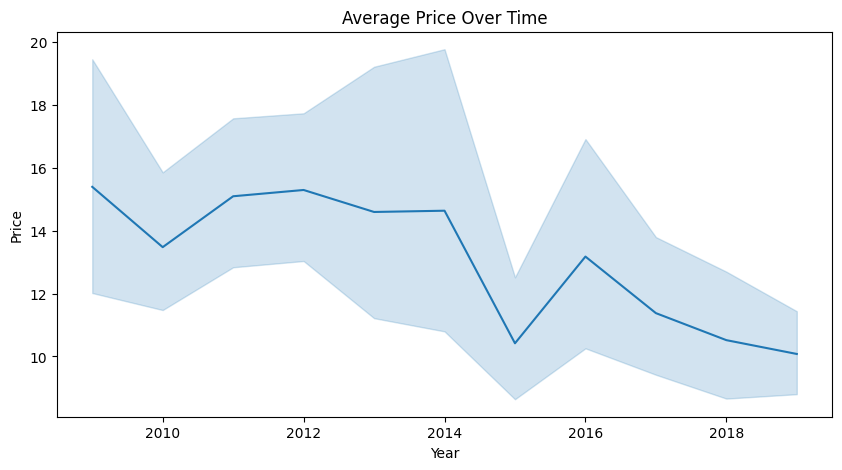

In [9]:
# Task 7: Hypothesis Testing & Significance Analysis
fiction = df[df['Genre'] == 'Fiction']['User Rating']
non_fiction = df[df['Genre'] == 'Non Fiction']['User Rating']
t_stat, p_val = stats.ttest_ind(non_fiction, fiction)
print(f"\nT-Test for H1 (Rating vs Genre): t = {t_stat:.4f}, p = {p_val:.4f}")
print("=>", "Reject H0: Significant difference" if p_val < 0.05 else "Fail to reject H0: No significant difference")

corr_coef, corr_pval = stats.pearsonr(df['Reviews'], df['User Rating'])
print(f"\nCorrelation (H2) between Reviews and Rating: r = {corr_coef:.4f}, p = {corr_pval:.4f}")
print("=>", "Significant correlation" if corr_pval < 0.05 else "Not significant")

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Price', data=df, estimator='mean').set_title("Average Price Over Time")
plt.show()

In [10]:
# Task 8: Conclusion & Next Steps
print("\n--- Conclusion & Next Steps ---")
print("✔ Non Fiction books tend to have slightly higher average ratings.")
print("✔ More reviews are moderately correlated with higher ratings.")
print("✔ Price trends fluctuate and can vary by year and genre.")
print("👉 Next steps: Use ML to predict ratings/prices, incorporate sentiment analysis from text reviews if available.")


--- Conclusion & Next Steps ---
✔ Non Fiction books tend to have slightly higher average ratings.
✔ More reviews are moderately correlated with higher ratings.
✔ Price trends fluctuate and can vary by year and genre.
👉 Next steps: Use ML to predict ratings/prices, incorporate sentiment analysis from text reviews if available.
